***Must download the following libraries to run the code***

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Title:** 

Does an increase in age and cholesterol level heighten heart disease risk?

**Introduction:**

This is a collaborative DSCI project that specifically focuses on answering a predictive question of our choice on the dataset. Starting from reading and tidying the data, we are required to visualize and classify the variables to answer the question.
We decided to use the Heart Disease dataset which consists of statistics on the physical attributes of Hungarian patients such as their age, sex, smoking habits, cholestral level, exercise level and finally the indication of heart disease diagnosis, collected from Hungarian hospitals. Our group decided to use classification and the K-nearest-neighbors algorithm to predict if higher cholestral and age contributes to the likelihood of heart disease.

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chol,num,thalach
<dbl>,<dbl>,<dbl>,<fct>,<dbl>
67,0,564,0,160
65,0,417,0,157
56,0,409,0,150
63,0,407,0,154
62,0,394,0,157
65,0,360,0,151
57,0,354,0,163
55,1,353,1,132
55,0,342,0,166


age,total_diagnosis
<dbl>,<int>
29,1
34,2
35,2
37,1
38,1
39,3
40,1
41,5
42,7


sex,average_age
<dbl>,<dbl>
0,56.33333
1,54.41830


chol
<dbl>
564


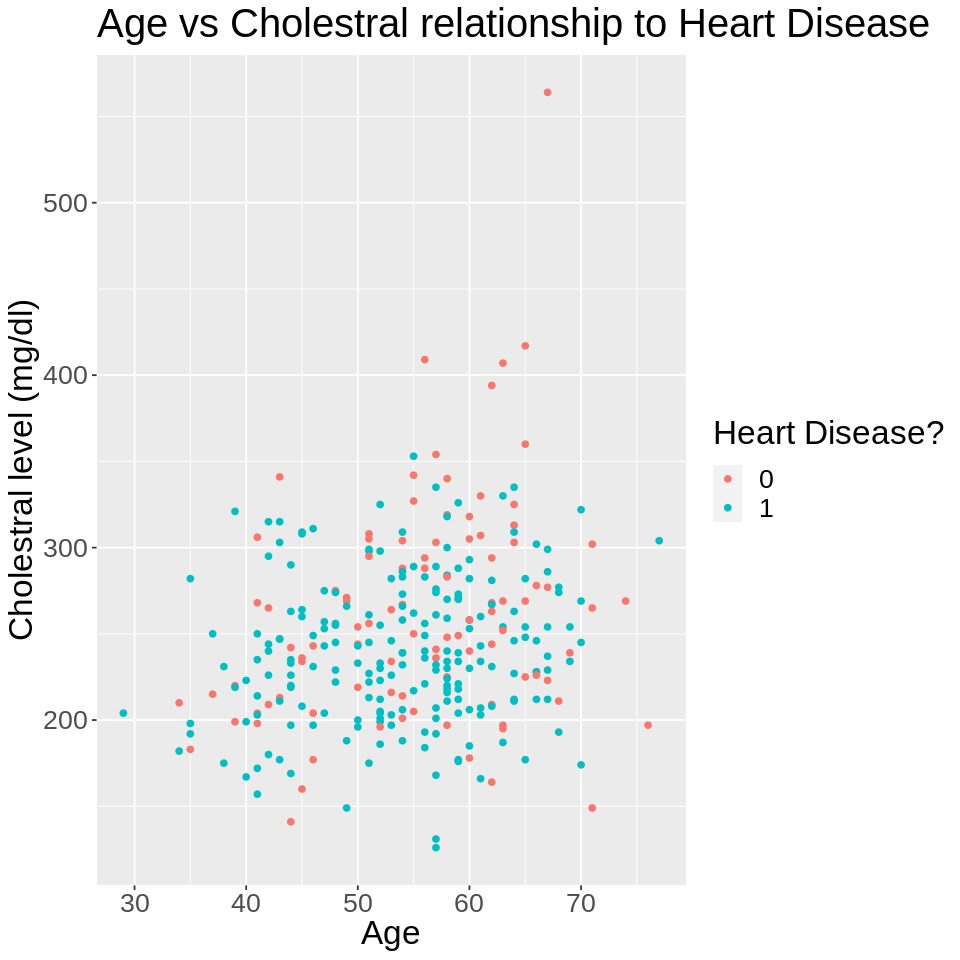

In [3]:
#Preliminary exploratory data analysis


#reading data from the web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_csv(url)

#tidying data

#adding column names
colnames(heart_data) <- c("age", "sex", "cp", "rbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

#mutating the data to make categorical variables
heart_data_tidy_1 <- heart_data |>
                        select(age, sex, chol, num, thalach) |>
                        mutate(num = as_factor(num)) |>
                        mutate(num = as_factor(sex)) |>
                        arrange(desc(chol))


#reorganizing observations to make it readable
organized_heart_data <- heart_data_tidy_1 |> mutate(num = recode(num, '4' = '1')) |>
                        mutate(num = recode(num, '3' = '1')) |>
                        mutate(num = recode(num, '2' = '1')) 
organized_heart_data

#group and summarizing data

#example of how we will split data
heart_data_split <- initial_split(organized_heart_data, prop = 0.75, strata = num)
heart_data_train <- training(heart_data_split) #we will use this for summarizing
heart_data_test <- testing(heart_data_split)

#summarizing data
#1 how many patients have heart disease depending on age
heart_data_summarize <- heart_data_train |>
                        group_by(age) |>
                        summarize(total_diagnosis = n())
                    
heart_data_summarize
#2 average age across patients
heart_data_summarize_2 <- heart_data_train |>
                        group_by(sex) |>
                        summarize(average_age = mean(age, na.rm = TRUE))

heart_data_summarize_2

#3 max cholestral level across patients
heart_data_summarize_3 <- heart_data_train |>
                        select(chol) |>
                        map_df(max, na.rm = TRUE)

heart_data_summarize_3             

#plotting data

#scatterplot of age vs height
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_plot_1 <- ggplot(organized_heart_data, aes(x = age, y = chol, color = num)) +
                geom_point() +
                labs(x = "Age", y = "Cholestral level (mg/dl)", color = "Heart Disease?") + 
                 ggtitle("Age vs Cholestral relationship to Heart Disease") +
                theme(text = element_text(size=20)) 

heart_plot_1

**Methods:**

For this predictive question, we will select the columns chol, age and num and mutate into categorical variables to determine if the increase of cholesterol and age heightens the heart disease risk. We begin the preprocessing by splitting the data into training and testing sets according to the proportion of the dataset and creating a recipe that sets heart disease indication as the class and finally use the ```step()``` function to standardize the data. Moreover, we are using 5-fold cross-validation with ```vfold_cv()``` and ```tune()``` to ensure our parameter won’t depend on the inconsistent data when deciding K-value. Next, we will create a workflow and use ```tune_grid()``` to pass in the cross-validated sample and the grid parameter so that it generates K values that are balanced in cost and accuracy. Here, we can collect_metrics() and filter the “accuracy” column from the training variable to ensure we have used the k with the highest accuracy. Lastly, we can predict the class by inputting tibble containing both high and low cholesterol and age values to compare which produces higher risk in heart disease. For this classification, we decided to present the relationship between age and serum cholesterol level in a ***scatterplot***. Scatterplot allows us to determine the relationship of 2 numerical quantities, while it is also the most effective for calculating distances of 2 points and classifying the point. We will plot the standardized values and add color aesthetics to distinguish heart disease indications to see if the unknown class has heart disease.

**Expected outcomes and significance:**

Through our classifier, we expect to find a positive correlation between the cholesterol level and heart disease diagnosis. Scientifically, human organ performance declines over time and the increasing cholesterol level prevents oxygen delivery. Thus, when the value of the predictors increase, we expect to find the neighbors to indicate heart disease. Discovering that age and cholesterol level contributes to the likeliness of heart disease through this classification alarms audiences about the risk once again. It could also propose new scientific study ideas related to the predictors, having a positive impact towards the medical field. Some further questions could be whether or not the increase in exercise level directly decreases heart disease risk. There can also be medical-related questions as to how biologically aging affects our body organs to create heart disease.